##LAB 02: GRADIENT DESCENT

1. Dùng 2 thuật toán Gradient Descent còn lại để tìm bộ Weight theo Heigh trong data fish
2. Dùng 3 thuật toán Gradient Descent đã học để tìm bộ Weight theo Height và Width trong data fish
3. Cho biết Weights tốt nhất cho các mô hình trên (Gợi ý: Nên lưu lại từng bộ Weights sau mỗi epoch) (cho câu 2 cả 3 thuật toán)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def gradbgd(w):
    global X, y, n
    return 1/n * X.T.dot(X.dot(w) - y)

In [3]:
# BGD
def bgd(w, learning_rate, iterations):
    global X, y, n
    for i in range(iterations):
        w = w - learning_rate * gradbgd(w)
        loss = np.mean(np.square(X.dot(w) - y))
        print(f'Loss at iter {i}: {loss}')
        
        
    print(f'Final loss: {loss}')
    print(f'Final W: {w}')
    return w

In [4]:
# SGD
def sgd(w, learning_rate, iterations):
    global X, y, n
    def grad(w):
        return X_j.T.dot(X_j.dot(w) - y_j)
    for i in range(iterations):
        rd_id = np.random.permutation(n)
        for j in rd_id:
            X_j = np.array([X[j,:]])
            y_j = np.array([y[j,:]])
            w = w - learning_rate * grad(w)  
        loss = np.mean(np.square(X.dot(w) - y))
        print(f'Loss at iter {i}: {loss}')
    print(f'Final loss: {loss}')
    print(f'Final W: {w}')
    return w

In [5]:
# Mini GD
def mgd(w, learning_rate, iterations):
    global X, y, n
    first_X = X.copy()
    first_y = y.copy() 
    def grad(w):
        n_j = X_j.shape[0]
        return 1/n_j * X_j.T.dot(X_j.dot(w)-y_j)
    for i in range(iterations):
        indices = np.random.permutation(n)
        first_X = first_X[indices]
        first_y = first_y[indices]
        temp = 20   
        for j in range(0, n, temp):
            X_j = first_X[j:temp,:]
            y_j = first_y[j:temp,:]
            w = w - learning_rate * grad(w)
            temp += temp if n - temp >= temp else n              
        loss = np.mean(np.square(X.dot(w) - y))
        print(f'Loss at iter {i}: {loss}')    
    print(f'Final loss: {loss}')
    print(f'Final W: {w}')
    return w

In [6]:
# Load Fish dataset
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Câu 1

In [7]:
# Data
X_0 = np.array([df['Height'].values]).T
y = np.array([df['Weight'].values]).T

In [8]:
# Add one to X
X = np.concatenate((X_0, np.ones((X_0.shape[0], 1))), axis=1)


# n samples
n = X.shape[0]


# Initial w
w = np.array([[1647], [0]])

# BGD

In [9]:
w_bgd = bgd(w, 0.01, 10)

Loss at iter 0: 65613.75546247416
Loss at iter 1: 60529.033818627446
Loss at iter 2: 60528.93148128281
Loss at iter 3: 60528.93147858015
Loss at iter 4: 60528.93147793944
Loss at iter 5: 60528.93147730115
Loss at iter 6: 60528.93147666518
Loss at iter 7: 60528.93147603154
Loss at iter 8: 60528.93147540025
Loss at iter 9: 60528.93147477127
Final loss: 60528.93147477127
Final W: [[  60.49911967]
 [-144.41638418]]


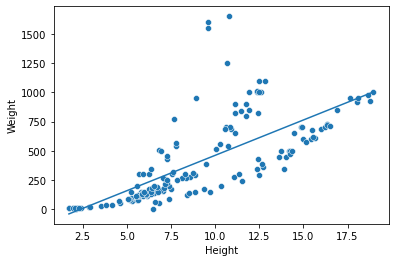

In [10]:
fig1=sns.scatterplot(x="Height",y="Weight",data=df)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(X,w_bgd).reshape(-1,))

# SGD

In [11]:
w_sgd = sgd(w, 0.0001, 10)

Loss at iter 0: 10433215.15467435
Loss at iter 1: 497288.472923029
Loss at iter 2: 78282.05406072713
Loss at iter 3: 61165.06933313936
Loss at iter 4: 60592.93681669072
Loss at iter 5: 60528.98210166683
Loss at iter 6: 60553.03468216176
Loss at iter 7: 60578.53648672983
Loss at iter 8: 60534.99749602583
Loss at iter 9: 60533.93174093434
Final loss: 60533.93174093434
Final W: [[  60.25828535]
 [-144.2417079 ]]


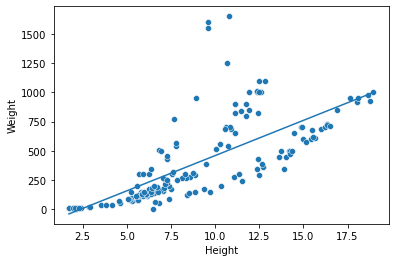

In [12]:
fig1=sns.scatterplot(x="Height",y="Weight",data=df)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(X,w_sgd).reshape(-1,))

# Mini GD

In [13]:
w_mgd = mgd(w, 0.001, 10)

Loss at iter 0: 49652892.24874377
Loss at iter 1: 8508729.94494706
Loss at iter 2: 1804852.9883693082
Loss at iter 3: 377644.03639747336
Loss at iter 4: 121531.79202555266
Loss at iter 5: 77141.67494353786
Loss at iter 6: 63505.026355812704
Loss at iter 7: 60686.11086975992
Loss at iter 8: 60788.66032831697
Loss at iter 9: 60600.99266245016
Final loss: 60600.99266245016
Final W: [[  61.31745252]
 [-144.02205877]]


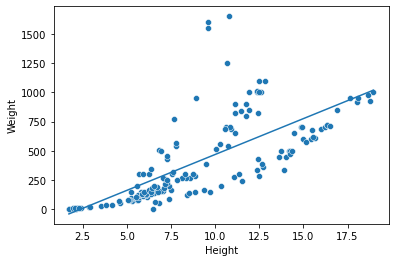

In [14]:
fig1=sns.scatterplot(x="Height",y="Weight",data=df)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(X,w_mgd).reshape(-1,))

# Câu 2

In [15]:
from sklearn.model_selection import train_test_split


# Split the data/targets into training/testing sets
X_train,X_test,y_train,y_test=train_test_split(df.loc[:,["Height","Width"]].values,df.loc[:,"Weight"].values,test_size=0.2,random_state=1)
y_train=y_train.reshape(-1,1)


y = y_train

In [16]:
# Add one to X
X = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)


# n samples
n = X.shape[0]


# Initial w
w = np.array([[-300], [450],  [-360]])

In [17]:
w_bgd = bgd(w, 0.01, 1000)

Loss at iter 0: 360544.8942394759
Loss at iter 1: 211816.0425692725
Loss at iter 2: 199608.11411430902
Loss at iter 3: 194600.74201557238
Loss at iter 4: 190082.49309923413
Loss at iter 5: 185702.1667112621
Loss at iter 6: 181438.57021531017
Loss at iter 7: 177287.7082510394
Loss at iter 8: 173246.55408088106
Loss at iter 9: 169312.20573071827
Loss at iter 10: 165481.84024651657
Loss at iter 11: 161752.70940404385
Loss at iter 12: 158122.13761958142
Loss at iter 13: 154587.52002414444
Loss at iter 14: 151146.32059421777
Loss at iter 15: 147796.07033218697
Loss at iter 16: 144534.36549487468
Loss at iter 17: 141358.86586889674
Loss at iter 18: 138267.2930915994
Loss at iter 19: 135257.4290163745
Loss at iter 20: 132327.1141211775
Loss at iter 21: 129474.245959108
Loss at iter 22: 126696.77764994098
Loss at iter 23: 123992.71641152557
Loss at iter 24: 121360.12212999878
Loss at iter 25: 118797.10596778759
Loss at iter 26: 116301.82900840076
Loss at iter 27: 113872.50093703847
Loss at ite

# SGD

In [18]:
w_sgd = sgd(w, 0.0001, 1000)

Loss at iter 0: 344964.3209228294
Loss at iter 1: 205142.6425899842
Loss at iter 2: 196132.3429996317
Loss at iter 3: 189761.61020974265
Loss at iter 4: 183999.2566068398
Loss at iter 5: 178639.48887984324
Loss at iter 6: 173665.29728568264
Loss at iter 7: 168985.54079806554
Loss at iter 8: 164307.247803023
Loss at iter 9: 159243.91253756886
Loss at iter 10: 154562.37992628073
Loss at iter 11: 150162.38598519098
Loss at iter 12: 145962.20561191376
Loss at iter 13: 141891.90536397658
Loss at iter 14: 138166.5560095566
Loss at iter 15: 134242.91062645422
Loss at iter 16: 130556.25008077032
Loss at iter 17: 126983.1352861052
Loss at iter 18: 123560.4117639474
Loss at iter 19: 120236.24293063572
Loss at iter 20: 117021.25996527694
Loss at iter 21: 114107.61879131157
Loss at iter 22: 110909.23894862861
Loss at iter 23: 108734.95962326103
Loss at iter 24: 105299.73490002855
Loss at iter 25: 102631.27991268162
Loss at iter 26: 100001.31798531195
Loss at iter 27: 97498.8616799459
Loss at iter 

Loss at iter 231: 24456.16560876233
Loss at iter 232: 24465.71867689876
Loss at iter 233: 24467.63824320884
Loss at iter 234: 24446.677790097165
Loss at iter 235: 24513.797576890604
Loss at iter 236: 24442.265908862675
Loss at iter 237: 24448.6550034807
Loss at iter 238: 24464.76753860951
Loss at iter 239: 24451.063255043166
Loss at iter 240: 24499.117530018433
Loss at iter 241: 24433.684473546746
Loss at iter 242: 24473.073702200563
Loss at iter 243: 24432.865616420782
Loss at iter 244: 24446.17045198735
Loss at iter 245: 24468.326474317255
Loss at iter 246: 24426.98316674086
Loss at iter 247: 24430.015983607278
Loss at iter 248: 24439.600460354344
Loss at iter 249: 24630.506487433995
Loss at iter 250: 24438.23368572803
Loss at iter 251: 24418.59699054698
Loss at iter 252: 24417.21841454987
Loss at iter 253: 24443.887146475467
Loss at iter 254: 24476.514623898278
Loss at iter 255: 24441.90056916034
Loss at iter 256: 24413.39579625303
Loss at iter 257: 24412.193507605043
Loss at iter 2

Loss at iter 524: 24409.211983049736
Loss at iter 525: 24409.946905323144
Loss at iter 526: 24388.444059218935
Loss at iter 527: 24449.298137073958
Loss at iter 528: 24398.95790017671
Loss at iter 529: 24401.142439836785
Loss at iter 530: 24404.25028282444
Loss at iter 531: 24385.93213695016
Loss at iter 532: 24390.428353153526
Loss at iter 533: 24384.25084078767
Loss at iter 534: 24387.50093857842
Loss at iter 535: 24482.462866368878
Loss at iter 536: 24384.075630900305
Loss at iter 537: 24462.095294951676
Loss at iter 538: 24395.65535124499
Loss at iter 539: 24455.438623113718
Loss at iter 540: 24386.501451240343
Loss at iter 541: 24384.994173960215
Loss at iter 542: 24407.556600696353
Loss at iter 543: 24412.23960800715
Loss at iter 544: 24383.850308094123
Loss at iter 545: 24389.1683680607
Loss at iter 546: 24406.58696980404
Loss at iter 547: 24400.57059722707
Loss at iter 548: 24383.444790685884
Loss at iter 549: 24383.79045814339
Loss at iter 550: 24389.083612979455
Loss at iter 

Loss at iter 848: 24388.882270191698
Loss at iter 849: 24384.3311003945
Loss at iter 850: 24387.944536818195
Loss at iter 851: 24391.52981971854
Loss at iter 852: 24397.98053364415
Loss at iter 853: 24401.054706136354
Loss at iter 854: 24389.90050125101
Loss at iter 855: 24387.892989609903
Loss at iter 856: 24383.70570596369
Loss at iter 857: 24391.458648464344
Loss at iter 858: 24414.51341874079
Loss at iter 859: 24482.00504803963
Loss at iter 860: 24419.420779710348
Loss at iter 861: 24383.619923125796
Loss at iter 862: 24383.877666260683
Loss at iter 863: 24447.362058820756
Loss at iter 864: 24387.972849848687
Loss at iter 865: 24390.93758538237
Loss at iter 866: 24386.733191642936
Loss at iter 867: 24394.96109331159
Loss at iter 868: 24394.98545100066
Loss at iter 869: 24437.431831930375
Loss at iter 870: 24390.2045245738
Loss at iter 871: 24394.79163241327
Loss at iter 872: 24386.746344266347
Loss at iter 873: 24434.864659307943
Loss at iter 874: 24451.132569134563
Loss at iter 87

# Mini GD

In [19]:
w_mgd = mgd(w, 0.001, 1000)

Loss at iter 0: 620745.794631351
Loss at iter 1: 295287.1437662071
Loss at iter 2: 217555.28998951285
Loss at iter 3: 205438.7270760547
Loss at iter 4: 197659.54440618574
Loss at iter 5: 194158.35860296676
Loss at iter 6: 190968.888495643
Loss at iter 7: 188126.01275379254
Loss at iter 8: 187133.71437639263
Loss at iter 9: 182724.84954626154
Loss at iter 10: 179997.9312107324
Loss at iter 11: 178240.06006883006
Loss at iter 12: 174105.24901355154
Loss at iter 13: 172732.792268262
Loss at iter 14: 169683.03986378628
Loss at iter 15: 165818.07223074403
Loss at iter 16: 163465.59254962576
Loss at iter 17: 160937.0308785334
Loss at iter 18: 158411.654618157
Loss at iter 19: 155741.7308678502
Loss at iter 20: 154266.42700956893
Loss at iter 21: 151200.26760511796
Loss at iter 22: 150152.76852744867
Loss at iter 23: 146967.8096729242
Loss at iter 24: 144367.1345374151
Loss at iter 25: 142526.7630451595
Loss at iter 26: 143864.3204986786
Loss at iter 27: 142490.9504152208
Loss at iter 28: 135

Loss at iter 483: 24459.26134908725
Loss at iter 484: 24519.082673100642
Loss at iter 485: 24492.67134991598
Loss at iter 486: 24453.17983826204
Loss at iter 487: 24440.846625469556
Loss at iter 488: 24401.637390945103
Loss at iter 489: 24412.513994387024
Loss at iter 490: 24420.724139788825
Loss at iter 491: 24431.896776425838
Loss at iter 492: 24402.260492969675
Loss at iter 493: 24399.049077768657
Loss at iter 494: 24549.733972620164
Loss at iter 495: 24439.3628058627
Loss at iter 496: 24399.735241129027
Loss at iter 497: 24702.76272450694
Loss at iter 498: 24486.890839882763
Loss at iter 499: 24398.610113782714
Loss at iter 500: 24531.532500762845
Loss at iter 501: 24400.761852946795
Loss at iter 502: 24472.929533155653
Loss at iter 503: 24412.77778762206
Loss at iter 504: 24439.925622429637
Loss at iter 505: 24620.913512300576
Loss at iter 506: 24614.7505898722
Loss at iter 507: 24620.28649313772
Loss at iter 508: 24456.93225519721
Loss at iter 509: 24520.881485166796
Loss at iter

# Câu 3

In [20]:
X_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
y_test = np.array([y_test]).T

In [21]:
# y predicted by bgd
y_bgd = X_test.dot(w_bgd)


print(np.linalg.norm(y_bgd - y_test))

1109.778477055341


In [22]:
# y predicted by sgd
y_sgd = X_test.dot(w_sgd)


print(np.linalg.norm(y_sgd - y_test))

1108.2014296841655


In [23]:
# y predicted by mgd
y_mgd = X_test.dot(w_mgd)


print(np.linalg.norm(y_mgd - y_test))

1118.821627722731
